# __Lending Club Case Study__

## 1. Data Sourcing

_Private data: Data generated by Banking, telecom, retail, and media are some of the key private sectors that rely heavily on data to make decisions._

#### _We are using private data in form of loan.csv as part of this case study_

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
loan = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)

## 2. Data Cleaning

_To identify the various quality issues and techniques to clean data_

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Look at loan head
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [5]:
# inspect the structure etc.
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


### 2.1 Fix missing values

1. Set values as missing values: Identify values that indicate missing data, and yet are not recognised by the software as such, e.g treat blank strings, "NA", "XX", "999", etc. as missing.
2. Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to keep missing values as such rather than exaggerating the existing rows/columns.
3. Delete rows, columns: Rows could be deleted if the number of missing values are significant in number, as this would not impact the analysis. Columns could be removed if the missing values are quite significant in number.
4. Fill partial missing values using business judgement: Missing time zone, century, etc. These values are easily identifiable.

In [6]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2) 

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         0.00
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [7]:
# dropping columns which have more than 60 % data missing as they will be useless
loan = loan.dropna(thresh=loan.shape[0]*0.6,how='all',axis=1)

In [8]:
# replacing Nan value with zero in order to identify columns having only 0 or Nan's value
#loan = loan.fillna(0)

In [9]:
# dropping columns which have all zero values as they will be useless
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [10]:
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### 2.2 Fix rows and columns

2.2.1 Checklist for Fixing Rows
1. Delete summary rows: Total, Subtotal rows
2. Delete incorrect rows: Header rows, Footer rows
3. Delete extra rows: Column number, indicators, Blank rows, Page No.

2.2.2 Checklist for Fixing Columns
1. Merge columns for creating unique identifiers if needed: E.g. Merge State, City into Full address
2. Split columns for more data: Split address to get State and City to analyse each separately
3. Add column names: Add column names if missing
4. Rename columns consistently: Abbreviations, encoded columns
5. Delete columns: Delete unnecessary columns
6. Align misaligned columns: Dataset may have shifted columns

In [11]:
# Drop irrelevant columns
loan.drop(['id','member_id','pymnt_plan','url','desc','title','delinq_2yrs','pub_rec','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_rec_late_fee','recoveries','collection_recovery_fee','policy_code','application_type','pub_rec_bankruptcies','zip_code','emp_title','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1, inplace=True)

### 2.3 Fix invalid values

1. Encode unicode properly: In case the data is being read as junk characters, try to change encoding, E.g. CP1252 instead of UTF-8.
2. Convert incorrect data types: Correct the incorrect data types to the correct data types for ease of analysis. E.g. if numeric values are stored as strings, it would not be possible to calculate metrics such as mean, median, etc. Some of the common data type corrections are — string to number: "12,300" to “12300”; string to date: "2013-Aug" to “2013/08”; number to string: “PIN Code 110001” to "110001"; etc.
3. Correct values that go beyond range: If some of the values are beyond logical range, e.g. temperature less than -273° C (0° K), you would need to correct them as required. A close look would help you check if there is scope for correction, or if the value needs to be removed.
4. Correct values not in the list: Remove values that don’t belong to a list. E.g. In a data set containing blood groups of individuals, strings “E” or “F” are invalid values and can be removed.
5. Correct wrong structure: Values that don’t follow a defined structure can be removed. E.g. In a data set containing pin codes of Indian cities, a pin code of 12 digits would be an invalid value and needs to be removed. Similarly, a phone number of 12 digits would be an invalid value.
6. Validate internal rules: If there are internal rules such as a date of a product’s delivery must definitely be after the date of the order, they should be correct and consistent.

In [12]:
#loan.loan_status.unique()

In [13]:
loan.drop_duplicates(keep=False, inplace=True)

In [14]:
# Convert int_rate into float 
loan['int_rate'] = loan["int_rate"].str.replace("%", "", case = False)
loan['int_rate'] = loan['int_rate'].astype('float64')

In [15]:
# Convert revol_util into float 
loan['revol_util'] = loan["revol_util"].str.replace("%", "", case = False)
loan['revol_util'] = loan['revol_util'].astype('float64')

In [16]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10+ years,RENT,...,3,13648,83.70,9,"5,833.84","5,000.00",863.16,Jan-15,171.62,May-16
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,< 1 year,RENT,...,3,1687,9.40,4,"1,008.71",456.46,435.17,Apr-13,119.66,Sep-13


In [17]:
# Converting issue_d column from object to datetime
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format = '%b-%y', errors='coerce')

In [18]:
# Converting last_pymnt_d column from object to datetime
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format = '%b-%y', errors='coerce')

In [19]:
# Converting last_credit_pull_d column from object to datetime
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format = '%b-%y', errors='coerce')

In [20]:
loan['issue_d_year'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_d_quarter'] = pd.DatetimeIndex(loan['issue_d']).year.astype(str)+'Q'+pd.DatetimeIndex(loan['issue_d']).quarter.astype(str)
loan['issue_d_month'] = pd.DatetimeIndex(loan['issue_d']).month
loan['issue_d_day'] = pd.DatetimeIndex(loan['issue_d']).day

In [21]:
# Intorducing new column emp_length_int to get column emp_length in interger dtype
loan['emp_length_int'] = loan['emp_length']
loan['emp_length_int'] = loan["emp_length_int"].str.replace(" years", "", case = False)
loan['emp_length_int'] = loan["emp_length_int"].str.replace(" year", "", case = False)
loan['emp_length_int'] = loan["emp_length_int"].str.replace("<", "", case = False)
loan['emp_length_int'] = loan["emp_length_int"].str.replace("\+", "", case = False)
loan['emp_length_int'] = loan["emp_length_int"].str.replace("n/a", "0", case = False)

In [22]:
#loan.emp_length_int.unique()

In [23]:
#loan.term.unique()
#  array([' 36 months', ' 60 months'], dtype=object)
# Trim whitespace from ends of each value across all series in dataframe using Regex expression
loan.replace('(^\s+|\s+$)', '', regex=True, inplace=True)
loan['emp_length_int'] = loan['emp_length_int'].astype('int64',errors = 'ignore')

In [24]:
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 34 columns):
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null float64
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             39717 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
earliest_cr_line       39717 non-null object
inq_last_6mths         39717 non-null int64
open_acc               397

###  2.4 Standardise values

1. Standardise units: Ensure all observations under a variable have a common and consistent unit, e.g. convert lbs to kgs, miles/hr to km/hr, etc.
2. Scale values if required:  Make sure the observations under a variable have a common scale
3. Standardise precision for better presentation of data, e.g. 4.5312341 kgs to 4.53 kgs.
4. Remove outliers: Remove high and low values that would disproportionately affect the results of your analysis.

#### _Removing Outliers: Plotting box-plot for column 'annual inc' and treating outliers_

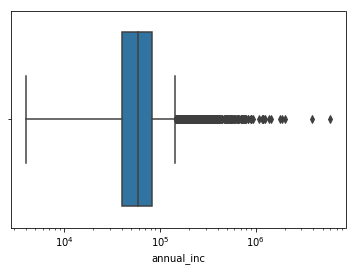

In [25]:
g = sns.boxplot(x='annual_inc', data=loan)
g.set_xscale('log')

In [26]:
loan.annual_inc.describe()

count      39,717.00
mean       68,968.93
std        63,793.77
min         4,000.00
25%        40,404.00
50%        59,000.00
75%        82,300.00
max     6,000,000.00
Name: annual_inc, dtype: float64

#### Applying the IQR technique to remove the outliers
_IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle. An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile._

In [27]:
q1, q2, q3= np.percentile(loan['annual_inc'],[25,50,75])

In [28]:
#print(q1)  40000.0
#print(q2)  58868.0
#print(q3)  82000.0
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q2 +(1.5 * iqr)

In [29]:
loan = loan.loc[(loan['annual_inc'] > lower_bound) & (loan['annual_inc'] < upper_bound)]

In [30]:
loan.annual_inc.describe()

count    36,484.00
mean     58,651.94
std      24,991.15
min       4,000.00
25%      40,000.00
50%      55,000.00
75%      75,000.00
max     121,722.00
Name: annual_inc, dtype: float64

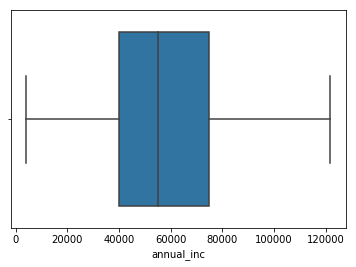

In [31]:
sns.boxplot(x='annual_inc', data=loan)

### 2.5 Filter Data

1. Deduplicate data: Remove identical rows, remove rows where some columns are identical
2. Filter rows: Filter by segment, filter by date period to get only the rows relevant to the analysis
3. Filter columns: Pick columns relevant to the analysis
4. Aggregate data: Group by required keys, aggregate the rest

#### _We are conidering only 2 loan status "Charged Off" and "Fully Paid" for our analysis and removing the status "Current" as its an intermittant indicator_

In [32]:
#loan.loan_status.unique()
loan = loan.loc[loan['loan_status'].isin(['Fully Paid','Charged Off'])]

## __Observations__

### Meta data available for the analysis post cleaning

_Below are the list of attributes identified for analysis post cleaning process_

#### Reference attribute: loan_status

#### I. Loan primary attributes 
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. term
5. int_rate
6. installment
7. grade
8. sub_grade

#### II. Consumer primary attributes
1. emp_length
2. home_ownership
3. annual_inc
4. verification_status
5. purpose
6. addr_state
7. dti
8. issue_d

#### III. Loan secondary attributes
1. earliest_cr_line
2. inq_last_6mths
3. open_acc
4. revol_bal
5. revol_util
6. total_acc
7. total_pymnt_inv
8. total_rec_prncp
9. total_rec_int
10. last_pymnt_d
11. last_pymnt_amnt
12. last_credit_pull_d

## 3. Univariate Analysis

In [33]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'issue_d_year', 'issue_d_quarter',
       'issue_d_month', 'issue_d_day', 'emp_length_int'],
      dtype='object')

In [34]:
# Univariate Analysis for Loan primary attributes
loan_attributes = loan[['loan_status','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment', 'grade', 'sub_grade']]
loan_attributes.describe(include='all')#.transpose()

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
count,35468,"35,468.00","35,468.00","35,468.00",35468,"35,468.00","35,468.00",35468,35468
unique,2,nan,nan,nan,2,nan,nan,7,35
top,Fully Paid,nan,nan,nan,36 months,nan,nan,B,A4
freq,30186,nan,nan,nan,26886,nan,nan,10779,2668
mean,NaN,"10,501.11","10,264.83","9,726.40",NaN,11.87,306.75,NaN,NaN
std,NaN,"6,912.56","6,671.78","6,600.50",NaN,3.65,195.03,NaN,NaN
min,NaN,500.00,500.00,0.00,NaN,5.42,15.69,NaN,NaN
25%,NaN,"5,000.00","5,000.00","4,950.65",NaN,8.94,161.80,NaN,NaN
50%,NaN,"9,000.00","9,000.00","8,000.00",NaN,11.71,265.69,NaN,NaN
75%,NaN,"14,500.00","14,000.00","13,151.50",NaN,14.27,402.63,NaN,NaN


In [35]:
loan_attributes.median()

loan_amnt         9,000.00
funded_amnt       9,000.00
funded_amnt_inv   8,000.00
int_rate             11.71
installment         265.69
dtype: float64

In [36]:
# binning loan primary attributes
loan['loan_amnt_cat'] = pd.cut(loan['loan_amnt'],5, right=False)
loan['funded_amnt_cat'] = pd.cut(loan['funded_amnt'],5, right=False)
loan['funded_amnt_inv_cat'] = pd.cut(loan['funded_amnt_inv'],5, right=False)
loan['int_rate_cat'] = pd.cut(loan['int_rate'],5, right=False)
loan['installment_cat'] = pd.cut(loan['installment'],5, right=False)

In [37]:
#loan.loan_amnt_cat.unique()

In [38]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d_year,issue_d_quarter,issue_d_month,issue_d_day,emp_length_int,loan_amnt_cat,funded_amnt_cat,funded_amnt_inv_cat,int_rate_cat,installment_cat
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10+ years,RENT,...,2011,2011Q4,12,1,10,"[500.0, 7400.0)","[500.0, 7400.0)","[0.0, 7000.0)","[9.216, 13.012)","[15.69, 273.59)"
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,< 1 year,RENT,...,2011,2011Q4,12,1,1,"[500.0, 7400.0)","[500.0, 7400.0)","[0.0, 7000.0)","[13.012, 16.808)","[15.69, 273.59)"
2,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,10+ years,RENT,...,2011,2011Q4,12,1,10,"[500.0, 7400.0)","[500.0, 7400.0)","[0.0, 7000.0)","[13.012, 16.808)","[15.69, 273.59)"
3,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,10+ years,RENT,...,2011,2011Q4,12,1,10,"[7400.0, 14300.0)","[7400.0, 14300.0)","[7000.0, 14000.0)","[13.012, 16.808)","[273.59, 531.49)"
5,5000,5000,"5,000.00",36 months,7.90,156.46,A,A4,3 years,RENT,...,2011,2011Q4,12,1,3,"[500.0, 7400.0)","[500.0, 7400.0)","[0.0, 7000.0)","[5.42, 9.216)","[15.69, 273.59)"


In [39]:
# Univariate Analysis for Consumer primary attributes
consumer_attributes = loan[['emp_length', 'home_ownership','annual_inc', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti','emp_length_int']]
consumer_attributes.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
emp_length,35468,12,10+ years,7504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,35468,5,RENT,17739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,"35,468.00",NaN,NaN,NaN,NaN,NaN,"58,514.19","25,006.12","4,000.00","40,000.00","55,000.00","75,000.00","121,722.00"
verification_status,35468,3,Not Verified,15947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_d,35468,55,2011-12-01 00:00:00,1924,2007-06-01 00:00:00,2011-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,35468,14,debt_consolidation,16782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_state,35468,50,CA,6295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,"35,468.00",NaN,NaN,NaN,NaN,NaN,13.50,6.67,0.00,8.40,13.66,18.78,29.99
emp_length_int,"35,468.00",NaN,NaN,NaN,NaN,NaN,4.86,3.43,0.00,2.00,4.00,8.00,10.00


In [40]:
consumer_attributes.mean()

annual_inc       58,514.19
dti                  13.50
emp_length_int        4.86
dtype: float64

In [41]:
consumer_attributes.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [42]:
consumer_attributes.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [43]:
consumer_attributes.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [44]:
consumer_attributes.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [45]:
# binning consumer attributes
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'],6, right=False)
loan['dti_cat'] = pd.cut(loan['dti'],5, right=False)
loan['emp_length_int_cat'] = pd.cut(loan['emp_length_int'],5, right=False)

In [46]:
# Univariate Analysis for loan secondary attributes
loan_sec_attributes = loan[['earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d']]
loan_sec_attributes.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
earliest_cr_line,35468,520,Oct-99,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,"35,468.00",NaN,NaN,NaN,NaN,NaN,0.86,1.06,0.00,0.00,1.00,1.00,8.00
open_acc,"35,468.00",NaN,NaN,NaN,NaN,NaN,9.11,4.33,2.00,6.00,8.00,11.00,42.00
revol_bal,"35,468.00",NaN,NaN,NaN,NaN,NaN,"11,857.64","13,000.78",0.00,"3,472.00","8,315.00","15,722.25","149,000.00"
revol_util,"35,420.00",NaN,NaN,NaN,NaN,NaN,48.56,28.25,0.00,25.20,48.90,71.90,99.90
total_acc,"35,468.00",NaN,NaN,NaN,NaN,NaN,21.39,11.14,2.00,13.00,20.00,28.00,87.00
total_pymnt_inv,"35,468.00",NaN,NaN,NaN,NaN,NaN,"10,659.85","8,123.23",0.00,"4,823.57","8,649.45","14,462.27","55,867.02"
total_rec_prncp,"35,468.00",NaN,NaN,NaN,NaN,NaN,"9,141.57","6,562.73",0.00,"4,200.00","7,784.07","12,000.00","35,000.02"
total_rec_int,"35,468.00",NaN,NaN,NaN,NaN,NaN,"1,992.21","2,217.47",0.00,621.14,"1,244.57","2,512.41","21,199.44"
last_pymnt_d,35398,101,2013-03-01 00:00:00,944,2008-01-01 00:00:00,2016-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
loan_sec_attributes.median()

inq_last_6mths        1.00
open_acc              8.00
revol_bal         8,315.00
revol_util           48.90
total_acc            20.00
total_pymnt_inv   8,649.45
total_rec_prncp   7,784.07
total_rec_int     1,244.57
last_pymnt_amnt     530.23
dtype: float64

In [48]:
# binning loan sec attributes
loan['inq_last_6mths_cat'] = pd.cut(loan['inq_last_6mths'],5, right=False)
loan['open_acc_cat'] = pd.cut(loan['open_acc'],5, right=False)
loan['revol_bal_cat'] = pd.cut(loan['revol_bal'],6, right=False)
loan['revol_util_cat'] = pd.cut(loan['revol_util'],5, right=False)
loan['total_acc_cat'] = pd.cut(loan['total_acc'],5, right=False)
loan['total_pymnt_inv_cat'] = pd.cut(loan['total_pymnt_inv'],5, right=False)
loan['total_rec_prncp_cat'] = pd.cut(loan['total_rec_prncp'],5, right=False)
loan['total_rec_int_cat'] = pd.cut(loan['total_rec_int'],5, right=False)
loan['last_pymnt_amnt_cat'] = pd.cut(loan['last_pymnt_amnt'],5, right=False)

In [49]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'issue_d_year', 'issue_d_quarter',
       'issue_d_month', 'issue_d_day', 'emp_length_int', 'loan_amnt_cat',
       'funded_amnt_cat', 'funded_amnt_inv_cat', 'int_rate_cat',
       'installment_cat', 'annual_inc_cat', 'dti_cat', 'emp_length_int_cat',
       'inq_last_6mths_cat', 'open_acc_cat', 'revol_bal_cat', 'revol_util_cat',
       'total_acc_cat', 'total_pymnt_inv_cat', 'total_rec_prncp_cat',
       'total_rec_int_cat', 'last_pymnt_amnt_cat'],
      dtype='object')

## 4. Bivariate Analysis

### 4.1 Bivariate analysis for Loan primary attributes

In [50]:
loan_attributes.corr(method='pearson')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
loan_amnt,1.00,0.98,0.94,0.29,0.93
funded_amnt,0.98,1.00,0.95,0.29,0.96
funded_amnt_inv,0.94,0.95,1.00,0.28,0.90
int_rate,0.29,0.29,0.28,1.00,0.27
installment,0.93,0.96,0.90,0.27,1.00


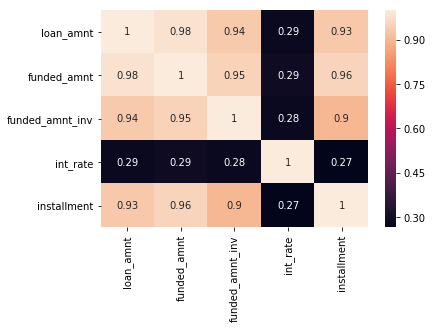

In [51]:
sns.heatmap(loan_attributes.corr(method='pearson'),annot=True)

### Observations

_Observing the correlation between loan primary attributes and heat map below attributes will be used for further analysis against loan status_

1. loan_amnt
2. int_rate
3. term
4. grade
5. sub_grade

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

In [53]:
x = pd.DataFrame(loan.groupby(['loan_amnt_cat', 'loan_status']).loan_amnt_cat.agg(['count'])/loan.groupby(['loan_amnt_cat']).loan_amnt_cat.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})

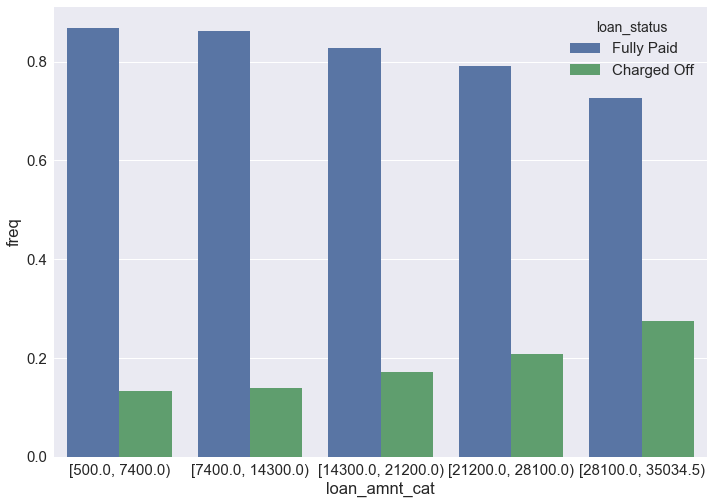

In [54]:
sns.barplot(x="loan_amnt_cat",y="freq", hue="loan_status", data=x,hue_order=['Fully Paid','Charged Off'])

___Observations___

_Probability of consumer defaulting is relatively higher in category of loan amount [28100,35000] _

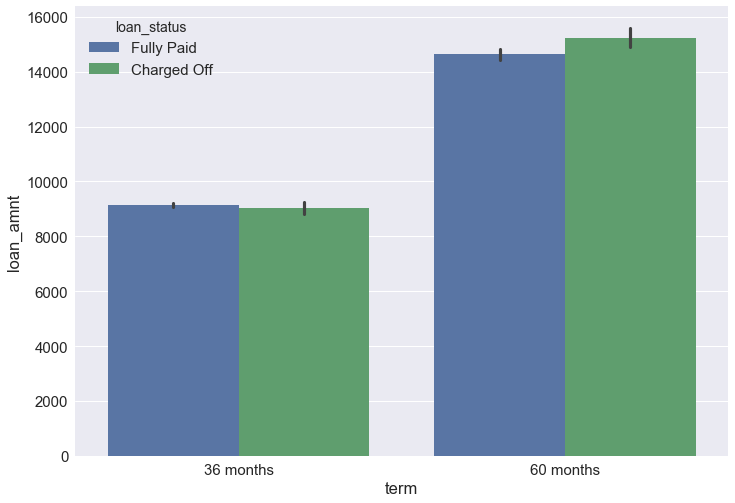

In [55]:
sns.barplot(x='term', y='loan_amnt', data=loan, hue='loan_status')

In [56]:
loan.groupby('term').revol_bal.count()

term
36 months    26886
60 months     8582
Name: revol_bal, dtype: int64

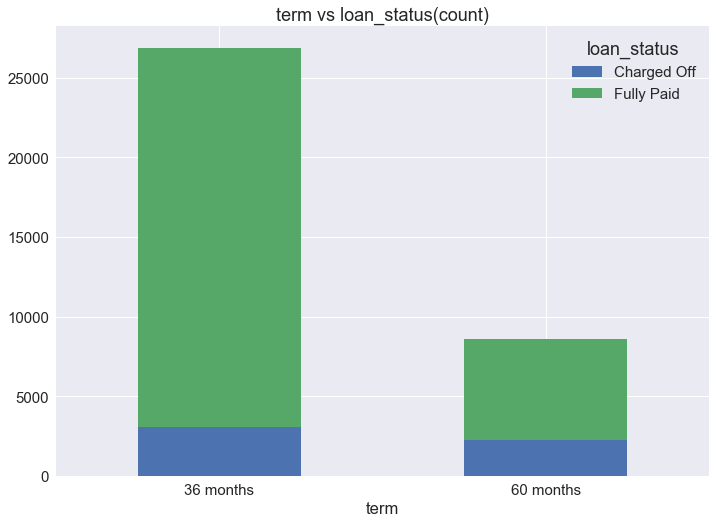

In [57]:
x = loan.pivot_table(values='loan_amnt', index='term',
                         columns='loan_status', aggfunc='count').plot(kind='bar', stacked=True, rot=0, title='term vs loan_status(count)')

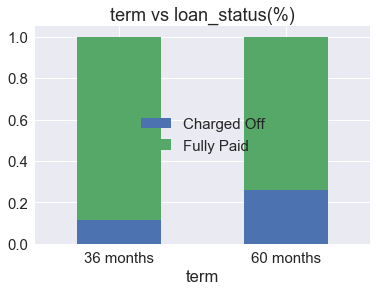

In [58]:
pd.crosstab(index=loan.term, columns=loan.loan_status, values=loan.loan_amnt,
            aggfunc='count', normalize='index').plot(kind='bar', stacked=True, rot=0, figsize=(6, 4), title='term vs loan_status(%)')
plt.legend(loc='center')

___Observations___

_Probability of consumer defaulting is relatively higher in 60 months term _

In [59]:
x = pd.DataFrame(loan.groupby(['grade', 'loan_status']).grade.agg(['count'])/loan.groupby(['grade']).grade.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})

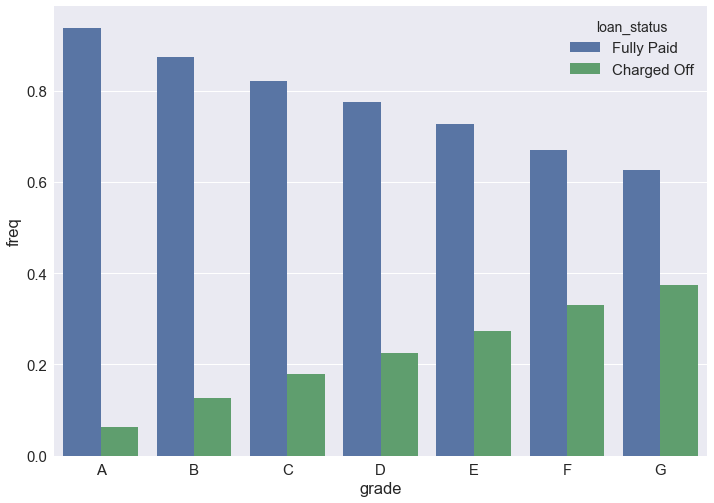

In [60]:
sns.barplot(x="grade",y="freq", hue="loan_status", data=x,order=['A', 'B','C','D','E','F','G'],hue_order=['Fully Paid','Charged Off'])

___Observations___

_Probability of borrower defaulting increases as the grade lowers, the grade G shows the highest probability of
default _

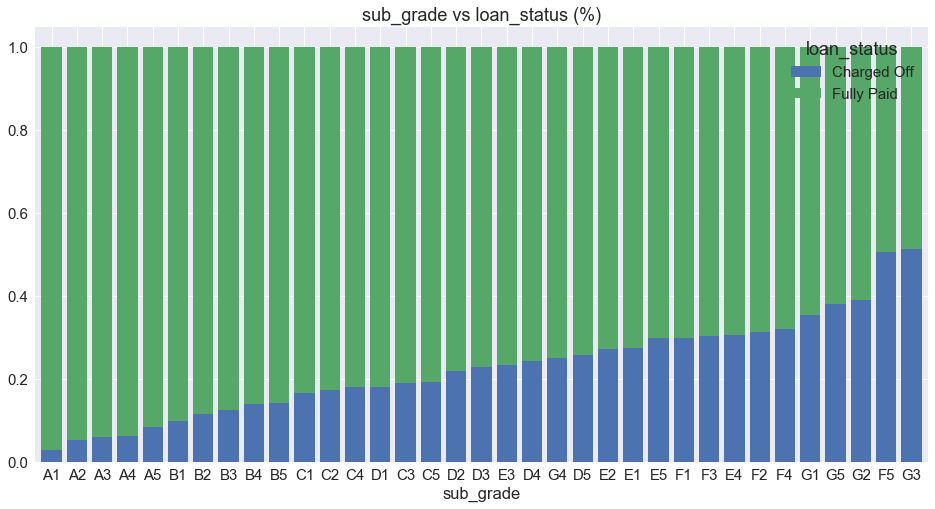

In [61]:
pd.crosstab(index=loan.sub_grade, columns=loan.loan_status, values=loan.loan_amnt,
            aggfunc='count', normalize='index').sort_values(by='Charged Off').plot(kind='bar', stacked=True, rot=0, figsize=(16, 8),
                                                     title='sub_grade vs loan_status (%)', width=0.8,legend=True)

___Observations___

1. Sub Grade F5 has 50% chances of a borrower defaulting
2. The plots show an increase in freq of charged off's for lower sub grades

In [62]:
x = pd.DataFrame(loan.groupby(['int_rate_cat', 'loan_status']).int_rate_cat.agg(['count'])/loan.groupby(['int_rate_cat']).int_rate_cat.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})

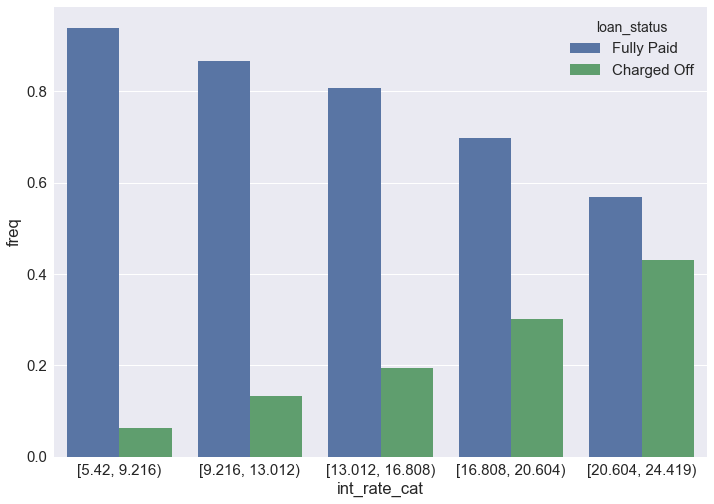

In [63]:
sns.barplot(x="int_rate_cat",y="freq", hue="loan_status", data=x,hue_order=['Fully Paid','Charged Off'])

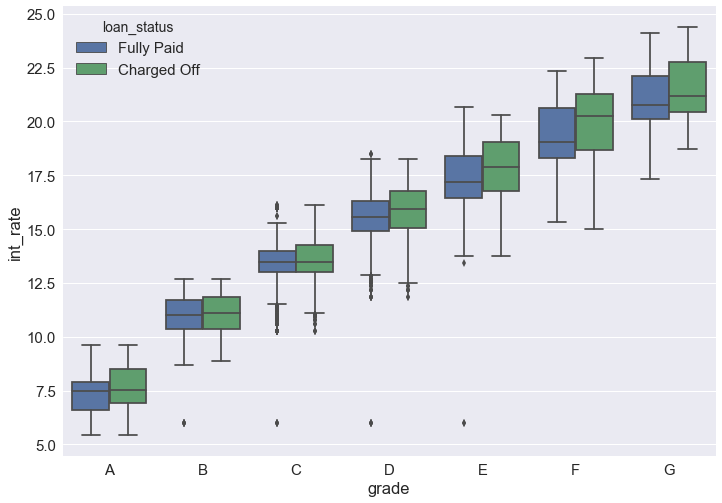

In [64]:
sns.boxplot(x="grade", y="int_rate", hue="loan_status",data=loan,order=['A', 'B','C','D','E','F','G'],hue_order=['Fully Paid','Charged Off'])

___Observations___

1. Loans with interest rate in the bracket of 20% to 25% have highest freq of default
2. Interest rates increases as the loan amount increases, higher interest rates have higher number of charge off’s
3. Higher interest rates are assigned to lower grades

In [65]:
consumer_attributes.corr(method='pearson')

,annual_inc,dti,emp_length_int
annual_inc,1.00,-0.06,0.22
dti,-0.06,1.00,0.06
emp_length_int,0.22,0.06,1.00


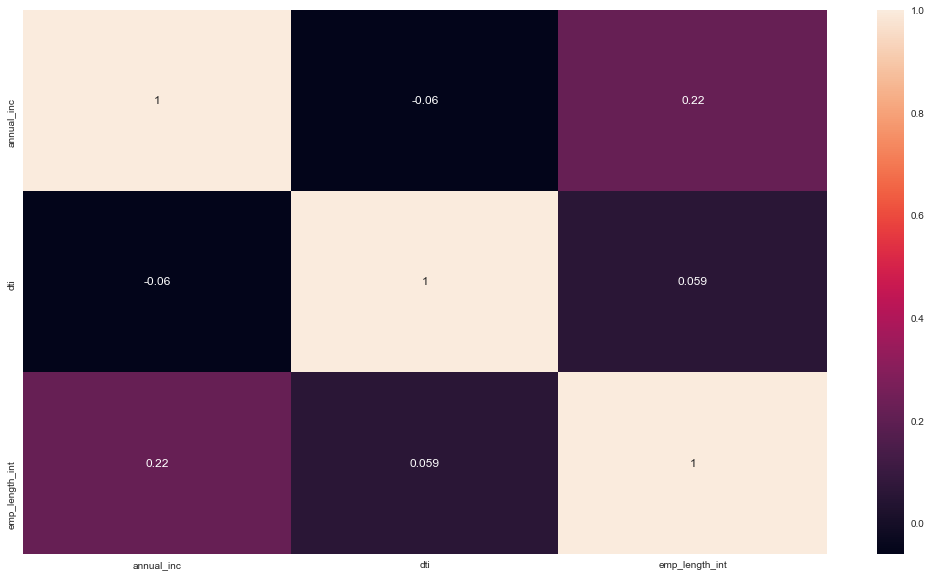

In [89]:
sns.heatmap(consumer_attributes.corr(method='pearson'),annot=True)

### Observations

_Observing the correlation between consumer attributes and heat map below attributes will be used for further analysis against loan status_

1. emp_length_int
2. home_ownership
3. verification_status
4. purpose
5. addr_state
6. issue_d
7. dti

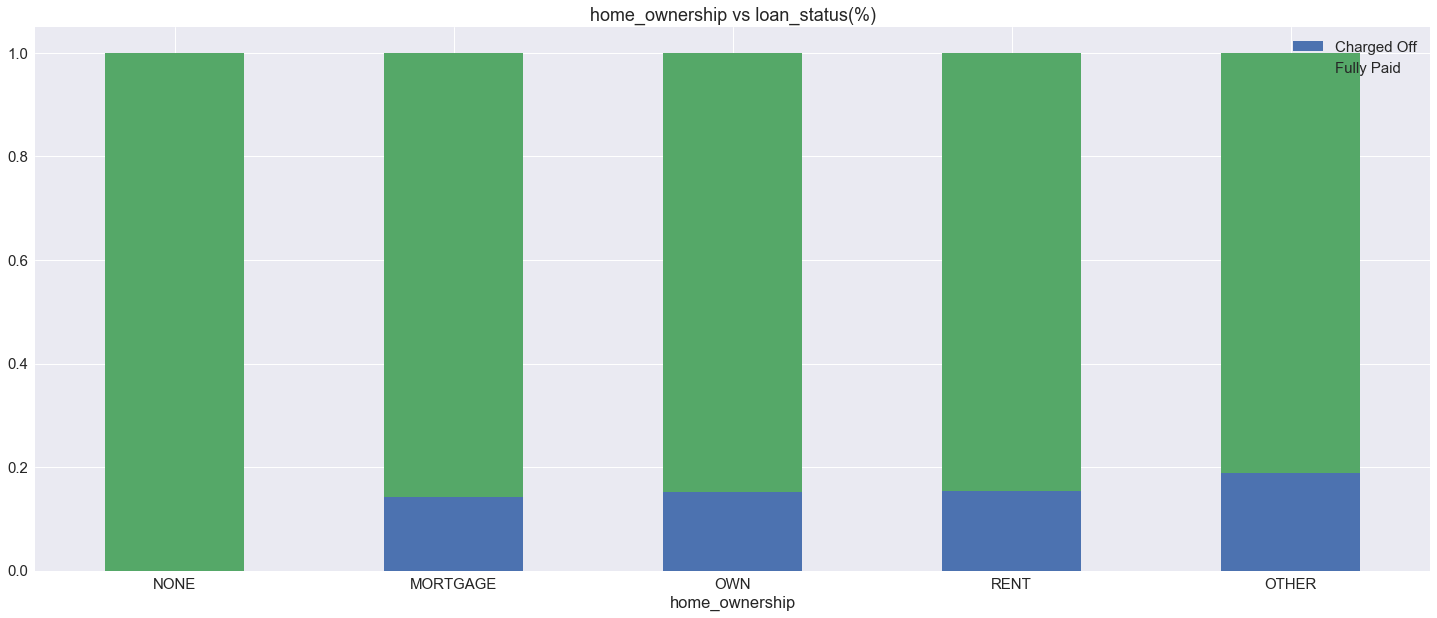

In [67]:
pd.crosstab(index=loan.home_ownership, columns=loan.loan_status, values=loan.loan_amnt,
            aggfunc='count', normalize='index').sort_values(by='Charged Off').plot(kind='bar', stacked=True, rot=0, figsize=(25,10), title='home_ownership vs loan_status(%)', sort_columns=True)
plt.legend(loc='upper right')

### _Observations_

_Borrowers with home ownership status as "other" have a higher default rate*_

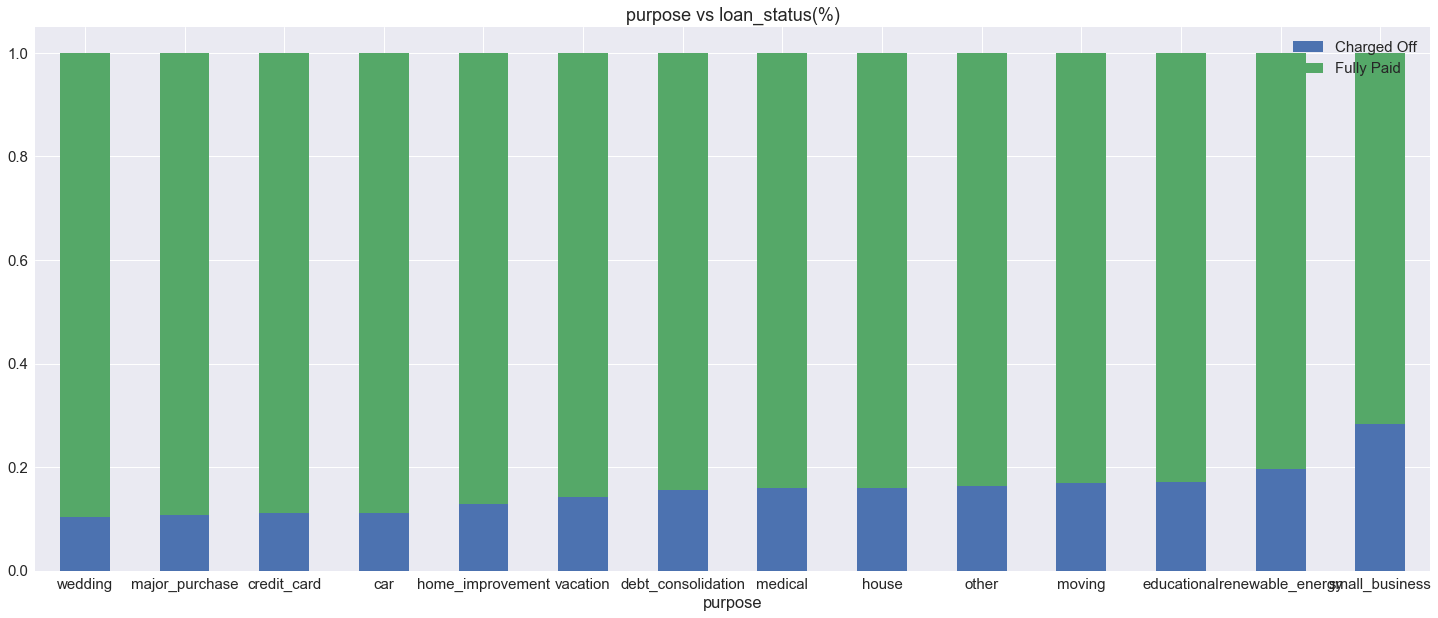

In [68]:
pd.crosstab(index=loan.purpose, columns=loan.loan_status, values=loan.loan_amnt,
            aggfunc='count', normalize='index').sort_values(by='Charged Off').plot(kind='bar', stacked=True, rot=0, figsize=(25,10), title='purpose vs loan_status(%)', sort_columns=True)
plt.legend(loc='upper right')

### _Observations_

_Borrowers with purpose as "small business" have a higher default rate_

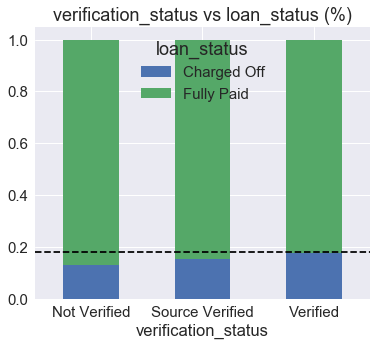

In [69]:
pd.crosstab(index=loan.verification_status, columns=loan.loan_status, values=loan.loan_amnt,
            aggfunc='count', normalize='index').sort_values(by='Charged Off').plot(kind='bar', stacked=True, rot=0, figsize=(6, 5),
                                                     title='verification_status vs loan_status (%)')
plt.axhline(0.18, color='k', linestyle = 'dashed')

### _Observations_

_Relatively verified loans seem to have more defaults, although variation is very less_

In [70]:
x = pd.DataFrame(loan[loan.loan_status == 'Charged Off'].groupby(['addr_state', 'loan_status']).grade.agg(['count'])/loan.groupby(['addr_state']).grade.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})

In [71]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(font_scale=1)

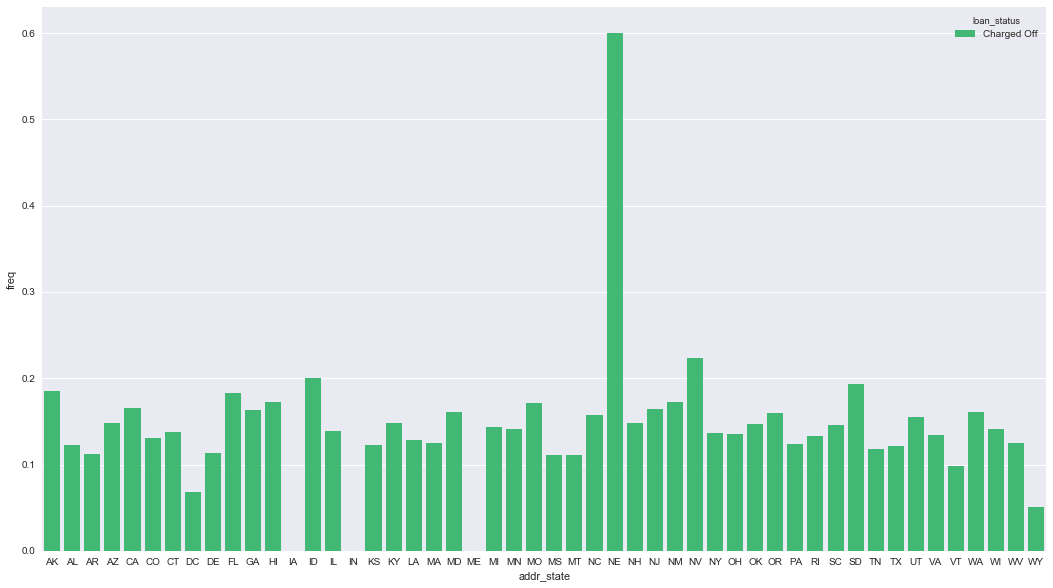

In [72]:
sns.barplot(x="addr_state",y="freq", hue="loan_status", data=x,order=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID','IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN','TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],palette= sns.color_palette(["#2ecc71"]))

### _Observations_

_Nebraska (NE) followed by Nevada (NV) and Idaho(ID) shows higher incidences of borrowers defaulting._

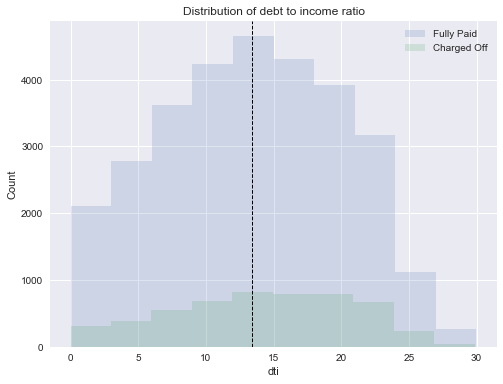

In [73]:
plt.figure(figsize=(8, 6))
x1 = loan[loan.loan_status == 'Fully Paid'].dti
y1 = loan[loan.loan_status == 'Charged Off'].dti
bins = 10
plt.hist(x1, bins, alpha=0.18, label='Fully Paid')
plt.hist(y1, bins, alpha=0.19, label='Charged Off')
plt.xlabel('dti')
plt.ylabel('Count')
plt.title('Distribution of debt to income ratio')
plt.legend(loc='upper right')
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

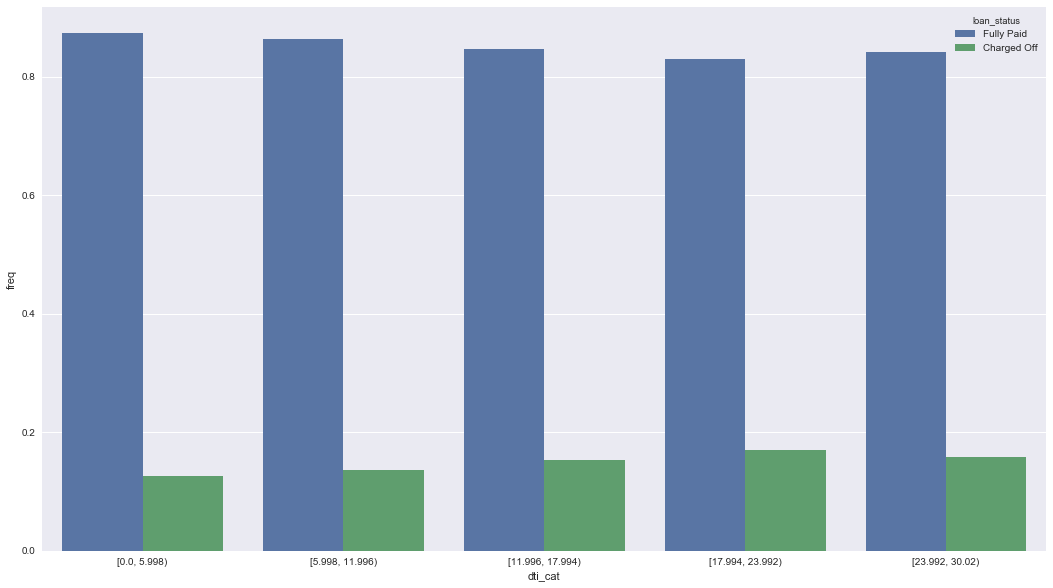

In [74]:
x = pd.DataFrame(loan.groupby(['dti_cat', 'loan_status']).dti_cat.agg(['count'])/loan.groupby(['dti_cat']).dti_cat.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})
sns.barplot(x="dti_cat",y="freq", hue="loan_status", data=x,hue_order=['Fully Paid','Charged Off'])

### _Observations_

_Probability of a borrower defaulting is high for borrowers with high dti_

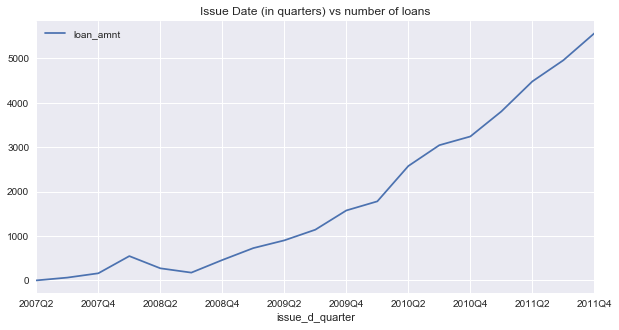

In [75]:
pd.DataFrame(loan.groupby(['issue_d_quarter']).loan_amnt.count()).reset_index().plot(kind='line',x='issue_d_quarter',  figsize=(10, 5),
                                                     title='Issue Date (in quarters) vs number of loans')

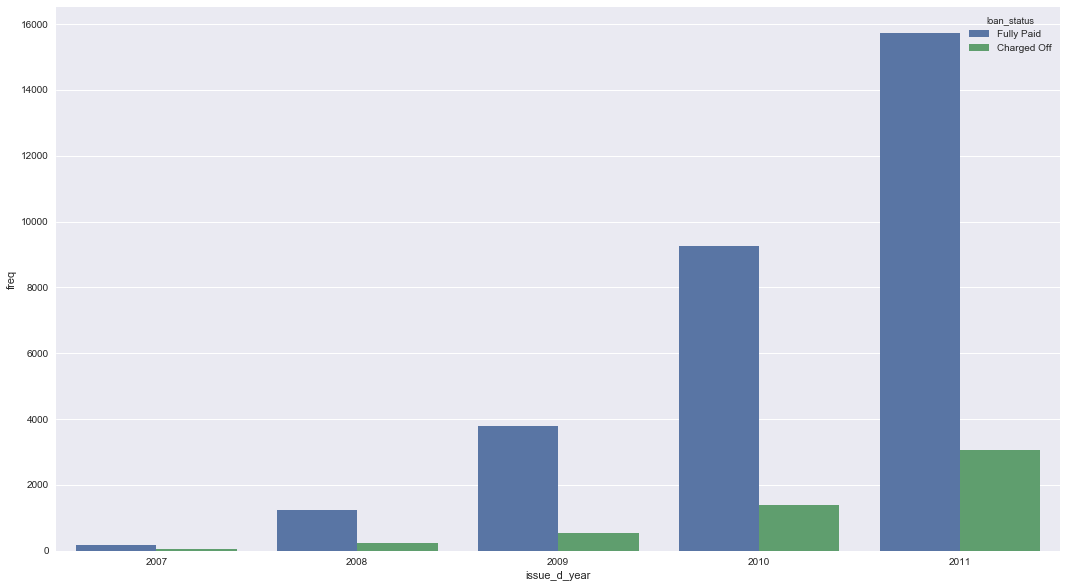

In [76]:
x=pd.DataFrame(loan.groupby(['issue_d_year','loan_status']).loan_amnt.count()).reset_index()
x=x.rename(index=str, columns={"loan_amnt": "freq"})
sns.barplot(x="issue_d_year",y="freq", hue="loan_status", data=x,hue_order=['Fully Paid','Charged Off'])

### _Observations_

1. The first plot Shows an exponential increase in the number of loans issued over by quarters by years
2. In the second plot ,there is a spike in the number of credit lines opened in borrower account in the Year 2K

In [77]:
#sorted(loan.emp_length.unique())
#'< 1 year','1 year','2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years'

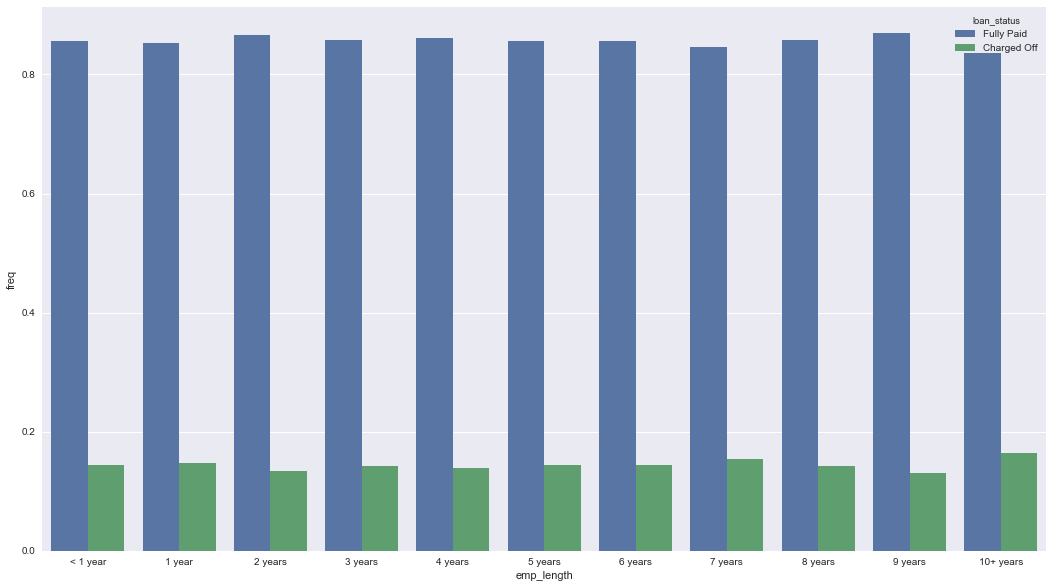

In [78]:
x = pd.DataFrame(loan.groupby(['emp_length', 'loan_status']).emp_length.agg(['count'])/loan.groupby(['emp_length']).emp_length.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})
sns.barplot(x="emp_length",y="freq", hue="loan_status", data=x,hue_order=['Fully Paid','Charged Off'],order=['< 1 year','1 year','2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years'])

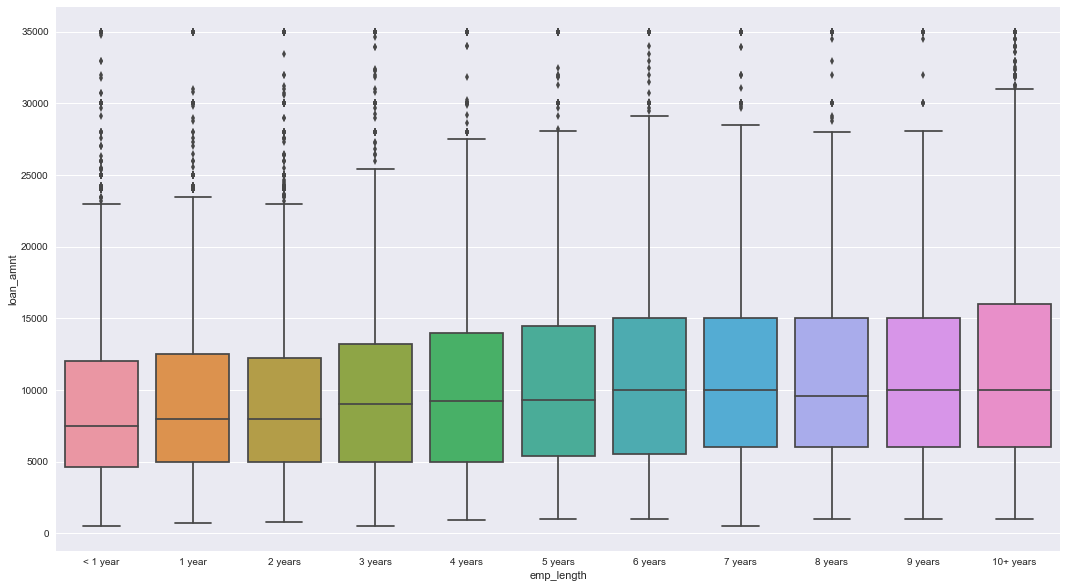

In [79]:
sns.boxplot(x="emp_length", y="loan_amnt", data=loan,order=['< 1 year','1 year','2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years'])

### _Observations_

1. Employees with higher work exp. (10+ years) tend to default more than those with lower work exp.
2. One reason for borrowers employed longer defaulting more could be because they are taking larger loan amounts

In [80]:
loan_sec_attributes.corr(method='pearson')


,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
inq_last_6mths,1.00,0.09,-0.02,-0.07,0.11,-0.03,-0.03,0.02,0.02
open_acc,0.09,1.00,0.28,-0.10,0.68,0.14,0.15,0.11,0.08
revol_bal,-0.02,0.28,1.00,0.32,0.31,0.26,0.27,0.23,0.12
revol_util,-0.07,-0.10,0.32,1.00,-0.08,0.08,0.03,0.20,-0.01
total_acc,0.11,0.68,0.31,-0.08,1.00,0.20,0.21,0.13,0.16
total_pymnt_inv,-0.03,0.14,0.26,0.08,0.20,1.00,0.94,0.80,0.50
total_rec_prncp,-0.03,0.15,0.27,0.03,0.21,0.94,1.00,0.68,0.56
total_rec_int,0.02,0.11,0.23,0.20,0.13,0.80,0.68,1.00,0.24
last_pymnt_amnt,0.02,0.08,0.12,-0.01,0.16,0.50,0.56,0.24,1.00


In [81]:
loan_sec_attributes.describe()

,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,"35,468.00","35,468.00","35,468.00","35,420.00","35,468.00","35,468.00","35,468.00","35,468.00","35,468.00"
mean,0.86,9.11,"11,857.64",48.56,21.39,"10,659.85","9,141.57","1,992.21","2,557.66"
std,1.06,4.33,"13,000.78",28.25,11.14,"8,123.23","6,562.73","2,217.47","4,187.44"
min,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,6.00,"3,472.00",25.20,13.00,"4,823.57","4,200.00",621.14,208.78
50%,1.00,8.00,"8,315.00",48.90,20.00,"8,649.45","7,784.07","1,244.57",530.23
75%,1.00,11.00,"15,722.25",71.90,28.00,"14,462.27","12,000.00","2,512.41","3,218.80"
max,8.00,42.00,"149,000.00",99.90,87.00,"55,867.02","35,000.02","21,199.44","36,115.20"


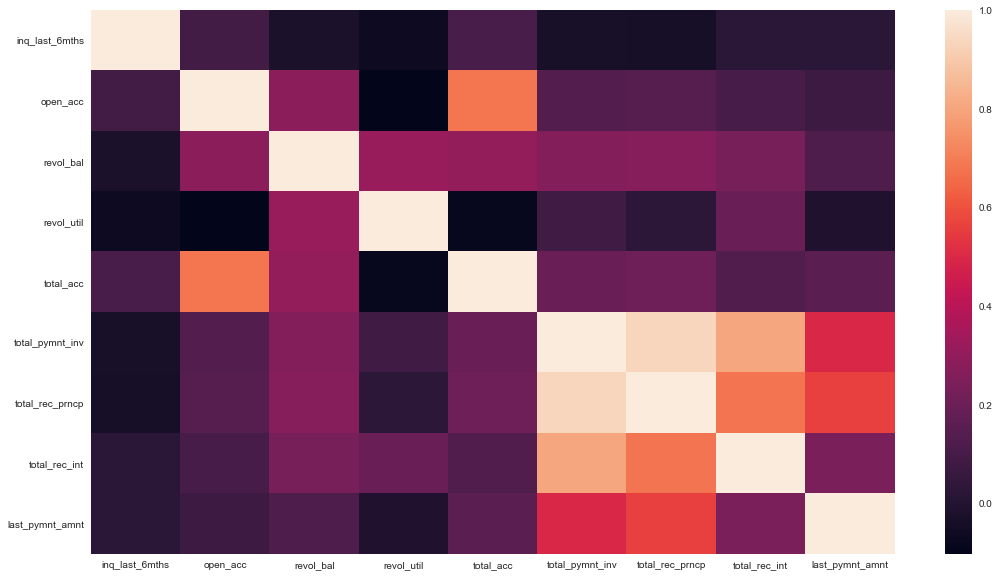

In [82]:
sns.heatmap(loan_sec_attributes.corr(method='pearson'))

### Observations

_Observing the correlation between consumer attributes and heat map below attributes will be used for further analysis against loan status_

1. revol_bal
2. inq_last_6mths
3. total_rec_int
4. total_acc
5. open_acc

In [83]:
x = pd.DataFrame(loan.groupby(['inq_last_6mths_cat', 'loan_status']).inq_last_6mths_cat.agg(['count'])/loan.groupby(['inq_last_6mths_cat']).inq_last_6mths_cat.agg(['count'])).reset_index()
x=x.rename(index=str, columns={"count": "freq"})

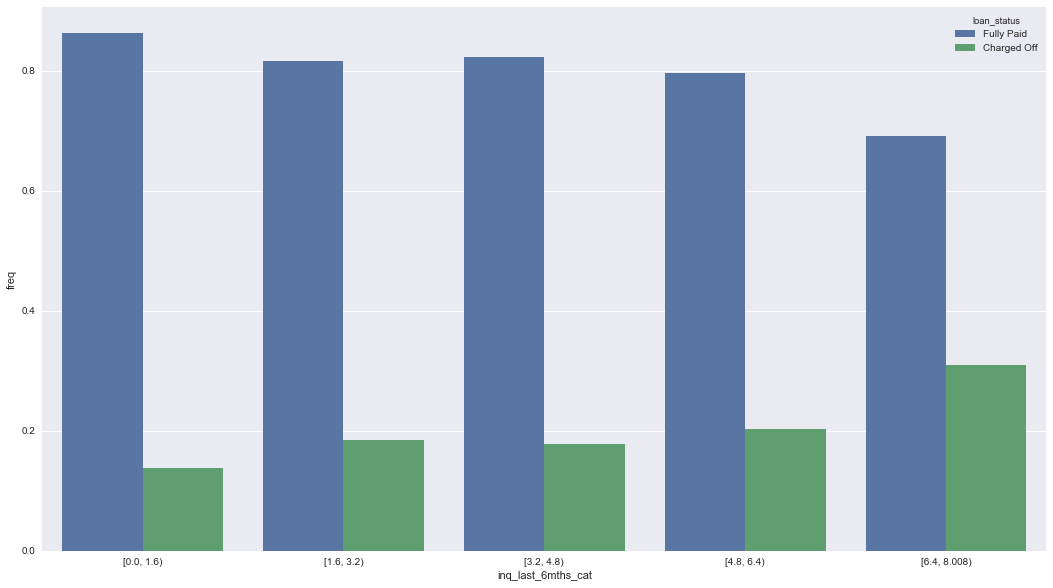

In [84]:
sns.barplot(x="inq_last_6mths_cat",y="freq", hue="loan_status", data=x,hue_order=['Fully Paid','Charged Off'])

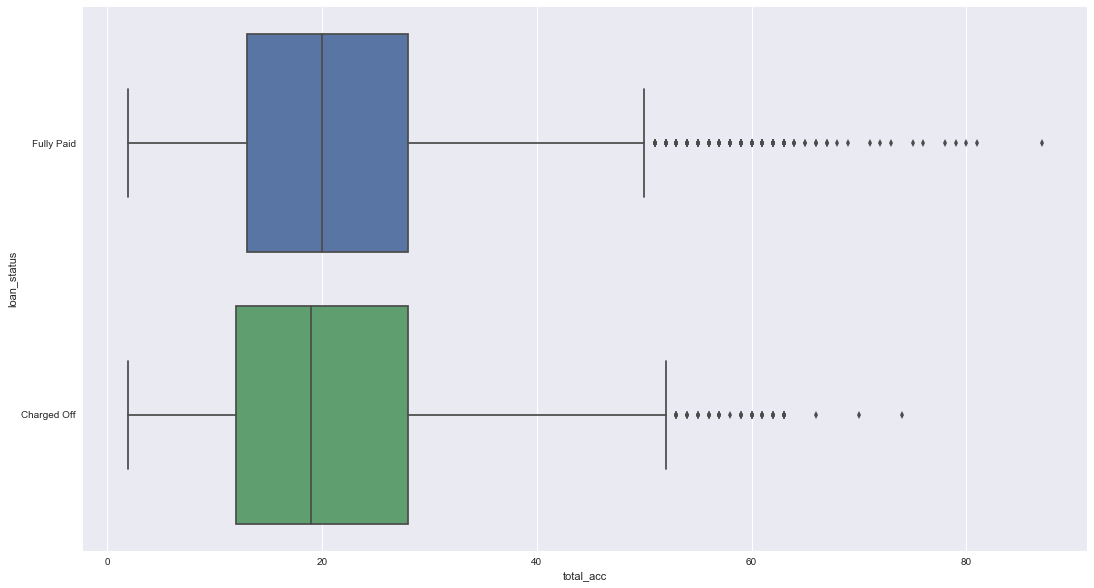

In [85]:
sns.boxplot(x="total_acc", y="loan_status", data=loan)

### _Observations_

_The total acc has no direct impact on the status of the loan_

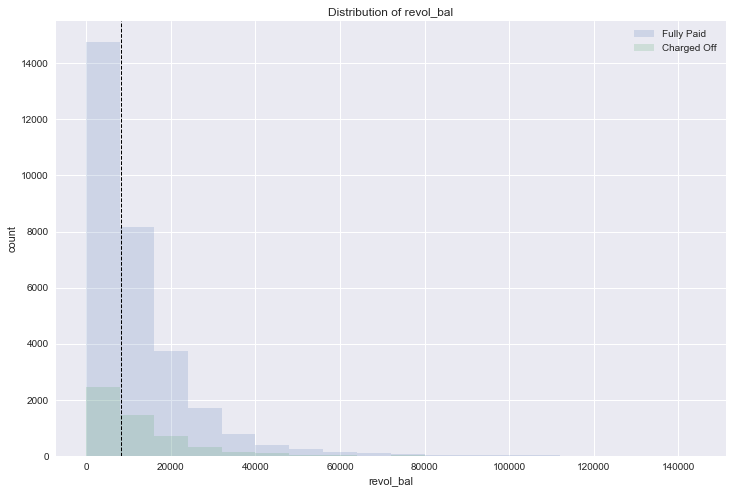

In [86]:
plt.figure(figsize=(12, 8))
x1 = loan[loan.loan_status == 'Fully Paid'].revol_bal
y1 = loan[loan.loan_status == 'Charged Off'].revol_bal
bins = range(0, 150000, 8000)
plt.hist(x1, bins, alpha=0.18, label='Fully Paid')
plt.hist(y1, bins, alpha=0.19, label='Charged Off')
plt.xlabel('revol_bal')
plt.ylabel('count')
plt.title('Distribution of revol_bal')
plt.legend(loc='upper right')
plt.axvline(x1.median(), color='k', linestyle='dashed', linewidth=1)
plt.show()

### _Observations_

_The revol bal although though affects the no of loans, but has no direct impact on the status of the loan_

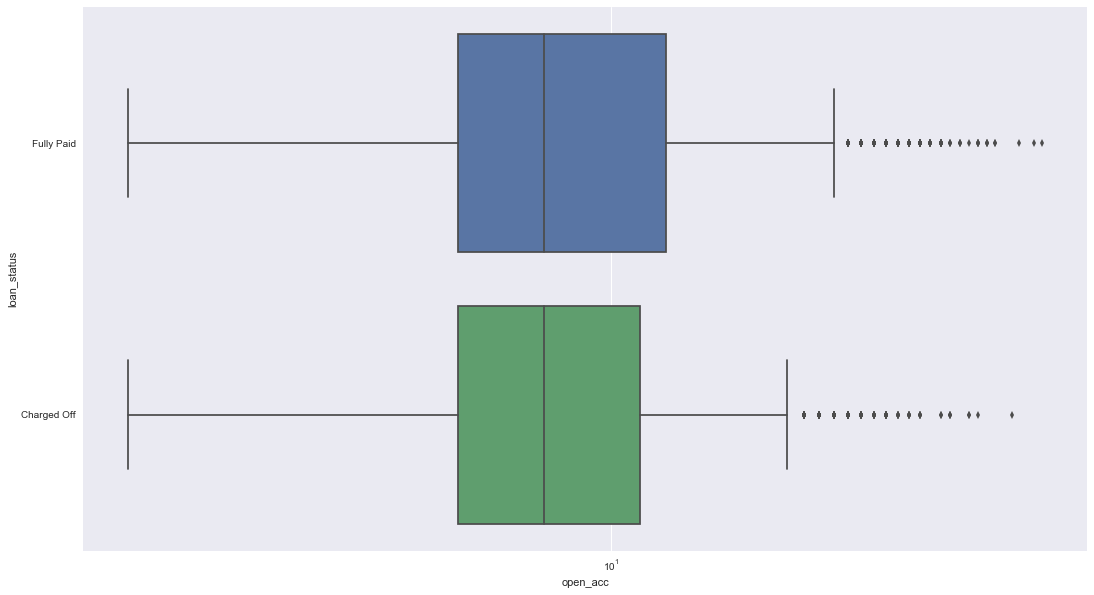

In [87]:
g = sns.boxplot(x="open_acc", y="loan_status", data=loan)
g.set_xscale('log')

### _Observations_

_The open acc has no direct impact on the status of the loan_

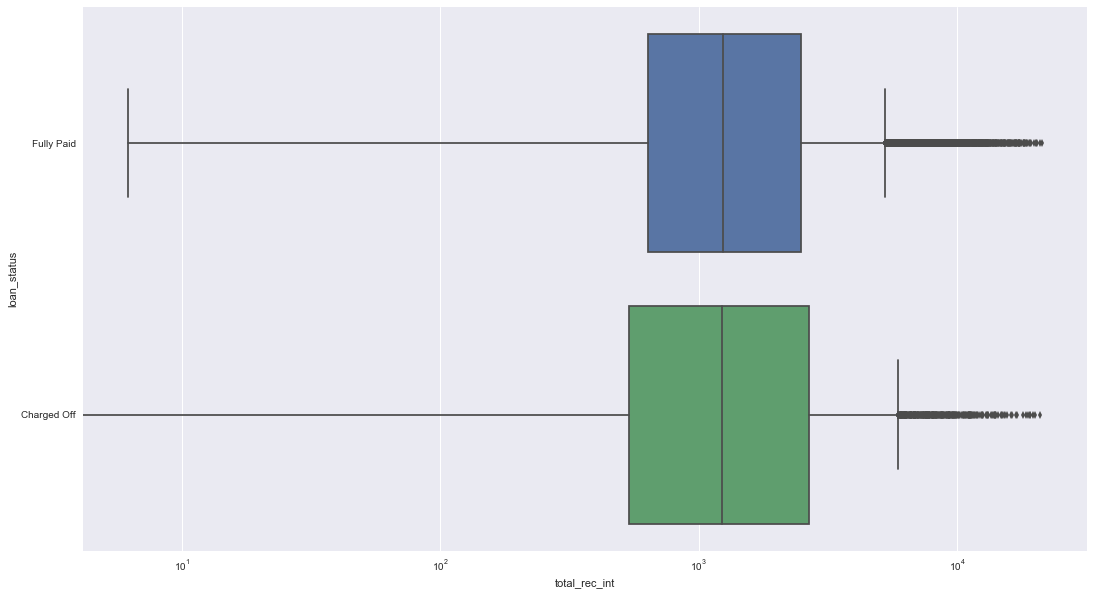

In [88]:
g = sns.boxplot(x="total_rec_int", y="loan_status", data=loan)
g.set_xscale('log')

### _Observations_

_The total rec int has no direct impact on the status of the loan_